## **Practice Time Series (ARIMA)**

In [37]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from datetime import datetime

import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('AirPassengers.csv')
df

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121
...,...,...
139,8/1/1960,606
140,9/1/1960,508
141,10/1/1960,461
142,11/1/1960,390


## **Change Format to Date Time**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [40]:
df = df.rename(columns={'TravelDate': 'Date'})

In [41]:
df['Date'] = pd.to_datetime(df['Date'])

In [42]:
df['Date'] = df['Date'].dt.date

## **EDA**

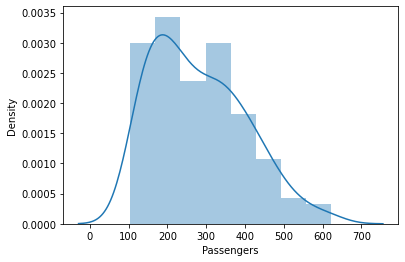

In [43]:
sns.distplot(df['Passengers']);

In [44]:
df['Passengers'].skew()

0.5831604861560892

In [45]:
import plotly.graph_objects as go

fig = go.Figure([go.Scatter(name='true', x=df['Date'], y=df['Passengers'])])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## **Stationarity**

**Cek stationarity dengan menggunakan adfuller test**

**Hypothesis untuk adfuller test:**

$H_0$: Data tidak stasioner

$H_1$: Data stasioner

In [46]:
adf = adfuller(df['Passengers'])
adf

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [47]:
adf = adfuller(df['Passengers'])
alpha = 0.05
if adf[1] <= alpha:
    print('Reject null hypothesis; The data is stationary')
else:
    print('Failed to reject null hypothesis; The data is not stationary')

Failed to reject null hypothesis; The data is not stationary


In [48]:
df_stationary = df.copy()

In [49]:
df_stationary['Passengers_Stationary'] = df_stationary['Passengers'].diff()
df_stationary['Passengers_Stationary_2'] = df_stationary['Passengers'].diff().diff()

In [50]:
df_stationary

,Date,Passengers,Passengers_Stationary,Passengers_Stationary_2
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,6.0,NaN
2,1949-03-01,132,14.0,8.0
3,1949-04-01,129,-3.0,-17.0
4,1949-05-01,121,-8.0,-5.0
...,...,...,...,...
139,1960-08-01,606,-16.0,-103.0
140,1960-09-01,508,-98.0,-82.0
141,1960-10-01,461,-47.0,51.0
142,1960-11-01,390,-71.0,-24.0


In [51]:
df_stationary = df_stationary.dropna()

In [52]:
df_stationary

,Date,Passengers,Passengers_Stationary,Passengers_Stationary_2
2,1949-03-01,132,14.0,8.0
3,1949-04-01,129,-3.0,-17.0
4,1949-05-01,121,-8.0,-5.0
5,1949-06-01,135,14.0,22.0
6,1949-07-01,148,13.0,-1.0
...,...,...,...,...
139,1960-08-01,606,-16.0,-103.0
140,1960-09-01,508,-98.0,-82.0
141,1960-10-01,461,-47.0,51.0
142,1960-11-01,390,-71.0,-24.0


In [53]:
adf_stat = adfuller(df_stationary['Passengers_Stationary'])
alpha = 0.05
if adf_stat[1] <= alpha:
    print('Reject null hypothesis; The data is stationary')
else:
    print('Failed to reject null hypothesis; The data is not stationary')

Failed to reject null hypothesis; The data is not stationary


In [54]:
adf_stat = adfuller(df_stationary['Passengers_Stationary_2'])
alpha = 0.05
if adf_stat[1] <= alpha:
    print('Reject null hypothesis; The data is stationary')
else:
    print('Failed to reject null hypothesis; The data is not stationary')

Reject null hypothesis; The data is stationary


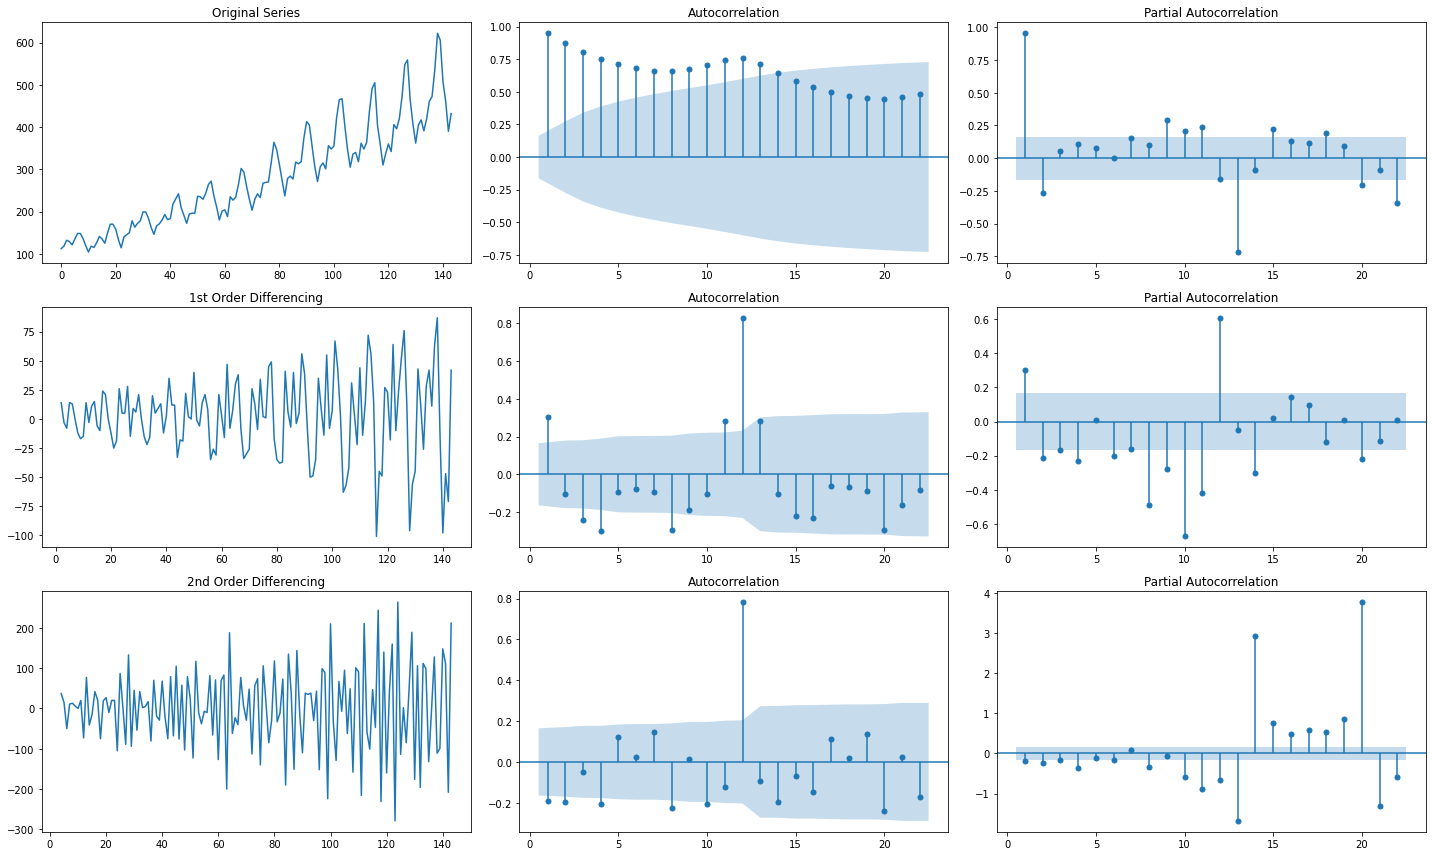

In [55]:
# Original Series
fig, axes = plt.subplots(3, 3, figsize = (20,12))
axes[0, 0].plot(df['Passengers']); axes[0, 0].set_title('Original Series')
plot_acf(df['Passengers'], ax=axes[0, 1], zero = False)
plot_pacf(df['Passengers'], ax=axes[0, 2], zero = False)

# 1st Differencing
axes[1, 0].plot(df_stationary['Passengers_Stationary']); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_stationary['Passengers_Stationary'].dropna(), ax=axes[1, 1], zero = False)
plot_pacf(df_stationary['Passengers_Stationary'].dropna(), ax=axes[1, 2], zero = False)

# 2nd Differencing
axes[2, 0].plot(df_stationary['Passengers_Stationary_2'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_stationary['Passengers_Stationary_2'].dropna(), ax=axes[2, 1], zero = False)
plot_pacf(df_stationary['Passengers_Stationary_2'].dropna(), ax=axes[2, 2], zero = False)

plt.tight_layout()
plt.show()

In [56]:
import pmdarima as pmd

arima_model = pmd.auto_arima(
    df_stationary['Passengers_Stationary_2'],
    start_p=1,
    start_q=1, trace=True,
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1452.590, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1449.026, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1450.596, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1442.078, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1439.877, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1421.694, Time=0.08 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1422.097, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1419.708, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1437.879, Time=0.05 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1420.111, Time=0

## **Modeling**

**Contoh kandidat model:**
1. ARIMA(2, 2, 2)
2. ARIMA(4, 2, 2)

In [57]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Passengers'], order = (2, 2, 2))
model_fit = model.fit()

In [58]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D2.Passengers   No. Observations:                  142
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -691.328
Method:                       css-mle   S.D. of innovations             30.953
Date:                Mon, 01 Nov 2021   AIC                           1394.656
Time:                        20:01:00   BIC                           1412.391
Sample:                             2   HQIC                          1401.863
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0043      0.087      0.049      0.961      -0.166       0.175
ar.L1.D2.Passengers    -0.4632      0.107     -4.349      0.000      -0.672      -0.254
ar.L2.D2.Passeng

In [59]:
model2 = ARIMA(df['Passengers'], order = (4, 2, 2))
model2_fit = model2.fit()
print(model2_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D2.Passengers   No. Observations:                  142
Model:                 ARIMA(4, 2, 2)   Log Likelihood                -683.629
Method:                       css-mle   S.D. of innovations             29.196
Date:                Mon, 01 Nov 2021   AIC                           1383.257
Time:                        20:01:00   BIC                           1406.904
Sample:                             2   HQIC                          1392.866
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0104      0.057      0.182      0.855      -0.102       0.123
ar.L1.D2.Passengers    -0.4079      0.109     -3.759      0.000      -0.621      -0.195
ar.L2.D2.Passeng

## **Forecasting**

In [60]:
forecast_length = 12
forecast_result = model2_fit.forecast(forecast_length)

In [61]:
print('Forecasted Value', forecast_result[0], '\n')
print('Forecasted SE', forecast_result[1], '\n')
print('Forecasted confidence interval', forecast_result[2])

Forecasted Value [496.07703671 508.46765271 527.27031165 498.99253216 493.63943384
 492.91239193 498.97169866 513.39968034 516.09626373 520.98301386
 520.49402272 521.96728543] 

Forecasted SE [ 29.19616284  50.47165586  62.87753563  71.19390106  74.71468636
  78.36534879  82.22025769  86.86633633  91.95739532  96.37506722
 100.47334959 104.04542475] 

Forecasted confidence interval [[438.85360907 553.30046436]
 [409.54502499 607.39028043]
 [404.03260638 650.50801692]
 [359.45505015 638.53001416]
 [347.20133945 640.07752822]
 [339.31913067 646.50565319]
 [337.82295479 660.12044253]
 [343.14478967 683.65457101]
 [335.86308079 696.32944667]
 [332.0913531  709.87467463]
 [323.56987613 717.41816932]
 [318.04200017 725.89257068]]


In [62]:
df.tail(13)

,Date,Passengers
131,1959-12-01,405
132,1960-01-01,417
133,1960-02-01,391
134,1960-03-01,419
135,1960-04-01,461
136,1960-05-01,472
137,1960-06-01,535
138,1960-07-01,622
139,1960-08-01,606
140,1960-09-01,508


In [63]:
Month = []

for i in range(1, forecast_length+1):
  Month.append('1961-'+str(i)+'-01')

In [64]:
df_forecast = pd.DataFrame({
    'Date': Month,
    'Passengers': forecast_result[0],
})

In [65]:
df_forecast['SE'] = forecast_result[1]
df_forecast['Lower Bound'] = forecast_result[2][:,0]
df_forecast['Upper Bound'] = forecast_result[2][:,1]
df_forecast

,Date,Passengers,SE,Lower Bound,Upper Bound
0,1961-1-01,496.077037,29.196163,438.853609,553.300464
1,1961-2-01,508.467653,50.471656,409.545025,607.390280
2,1961-3-01,527.270312,62.877536,404.032606,650.508017
3,1961-4-01,498.992532,71.193901,359.455050,638.530014
4,1961-5-01,493.639434,74.714686,347.201339,640.077528
5,1961-6-01,492.912392,78.365349,339.319131,646.505653
6,1961-7-01,498.971699,82.220258,337.822955,660.120443
7,1961-8-01,513.399680,86.866336,343.144790,683.654571
8,1961-9-01,516.096264,91.957395,335.863081,696.329447
9,1961-10-01,520.983014,96.375067,332.091353,709.874675


In [66]:
df_forecast.iloc[:12,:][['Date', 'Passengers']]

,Date,Passengers
0,1961-1-01,496.077037
1,1961-2-01,508.467653
2,1961-3-01,527.270312
3,1961-4-01,498.992532
4,1961-5-01,493.639434
5,1961-6-01,492.912392
6,1961-7-01,498.971699
7,1961-8-01,513.399680
8,1961-9-01,516.096264
9,1961-10-01,520.983014


In [67]:
df_forecast.iloc[:1,:][['Date', 'Passengers']]

,Date,Passengers
0,1961-1-01,496.077037


In [68]:
df = df.append(df_forecast.iloc[:1,:][['Date', 'Passengers']])

In [69]:
df_merged = df
df_merged = df_merged.append(df_forecast.iloc[:12,:][['Date', 'Passengers']], ignore_index=True)
df_merged.tail(24)

,Date,Passengers
133,1960-02-01,391.000000
134,1960-03-01,419.000000
135,1960-04-01,461.000000
136,1960-05-01,472.000000
137,1960-06-01,535.000000
138,1960-07-01,622.000000
139,1960-08-01,606.000000
140,1960-09-01,508.000000
141,1960-10-01,461.000000
142,1960-11-01,390.000000


In [70]:
fig = go.Figure([go.Scatter(name='Actual', x=df['Date'], y=df['Passengers'])])
fig.add_trace(go.Scatter(name='Forecast', x=df_forecast['Date'], y=df_forecast['Passengers']))
fig.add_trace(go.Scatter(name='Lower Bound', x=df_forecast['Date'], y=df_forecast['Lower Bound']))
fig.add_trace(go.Scatter(name='Upper Bound', x=df_forecast['Date'], y=df_forecast['Upper Bound']))

fig.update_xaxes(rangeslider_visible = True)
fig.show()

As you can see , Althougth the model can do Forecast but there not following pattern in all previous year, we can add more feature like maybe special holiday in specific time stamp like Christmas, Independec day, summer holiday, etc. It could add accuracy to the model as well